# CSE 482 Exercise 6 (Date: February 15, 2019)

The goal of this exercise is to help you get familiarize with some of the classification methods available in Python. Save your Jupyter notebook as exercise6.ipynb and submit it along with its HTML version.

**1.** In this exercise, you need to apply a variety of classification methods to the Autistic Spectrum Disorder Screening Data/ Your goal is to classify each child or adolescent as positive or negative class for autism disorder. The original data was obtained from the UCI Machine Learning Repository (https://archive.ics.uci.edu/ml/datasets/Autistic+Spectrum+Disorder+Screening+Data+for+Children++ and https://archive.ics.uci.edu/ml/datasets/Autistic+Spectrum+Disorder+Screening+Data+for+Adolescent+++). The combined and preprocessed data (autism_data.csv) can be downloaded from the class webpage. 

**2.** Load the autism_data.csv file into a pandas dataframe object named data. Note that some columns may contain missing values. Discard the rows with missing values using the dropna() function (see lecture 6 on how to discard rows with missing values from a DataFrame object).

**Solution:**

In [1]:
import pandas as pd

data = pd.read_csv('autism_data.csv')
print('Number of rows (before removing missing values) =', data.shape[0] )
data = data.dropna()    # remove rows with missing values
print('Number of rows (after removing missing values) =', data.shape[0] )
data.head()

Number of rows (before removing missing values) = 396
Number of rows (after removing missing values) = 392


,Age,Gender,Jaundice,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,Class
0,6.0,1,0,1,1,0,0,1,1,0,1,0,0,No
1,6.0,1,0,1,1,0,0,1,1,0,1,0,0,No
2,6.0,1,0,1,1,0,0,0,1,1,1,0,0,No
3,5.0,2,1,0,1,0,0,1,1,0,0,0,1,No
4,5.0,1,1,1,1,1,1,1,1,1,1,1,1,Yes


**3.** Extract the class (target) attribute Y and predictor attributes X from the dataframe. Split X and Y into training and test sets using scikit learn train_test_split() function. Use 70% for training and the remaining 30% for test. 

**Solution:**

In [2]:
from sklearn.model_selection import train_test_split

y = data['Class']
X = data.drop('Class', axis =1)
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.3, random_state=1)

**4.** Apply a decision tree classifier to the training dataset. Train the classifier with the following max depth hyperparameter values: 1, 5, 10, 20, 30, 40, and 50. Apply 10-fold cross validation on X_train and Y_train to select the hyperparameters (make sure you donâ€™t apply it to the original X and Y since hyperparameter selection must be done using the training set only). For each hyperparameter, calculate the corresponding validation set accuracy, which is automatically returned by the cross_val_score function (see lecture 11). Take their average values to be the validation set accuracy for the given hyperparameter. Also, train a decision tree classifier on the entire training data (with each hyperparameter). Apply the classifier to the test data and calculate the test accuracy. Draw a plot of the test set accuracy and validation set accuracy against the maximum depth hyperparameter. Show the hyperparameter that gives the highest validation set accuracy. Show also the test accuracy for the chosen best hyperparameter.

**Solution:**

Best hyperparameter, maxdepth = 10
Test Accuracy = 0.923728813559322


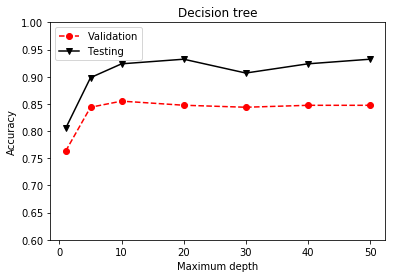

In [3]:
import numpy as np
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
%matplotlib inline

maxdepths = [1,5,10,20,30,40,50]
validationAcc = np.zeros(len(maxdepths))
testAcc = np.zeros(len(maxdepths))
index = 0
numFolds = 10

np.random.seed(1)
for depth in maxdepths:
    clf = tree.DecisionTreeClassifier( max_depth=depth )
    scores = cross_val_score(clf, X_train, Y_train, cv=numFolds)
    validationAcc[index] = np.mean(scores)
    clf.fit(X_train, Y_train)
    Y_predTest = clf.predict(X_test)
    testAcc[index] = accuracy_score( Y_test, Y_predTest)
    index += 1
    
plt.plot(maxdepths, validationAcc, 'ro--', maxdepths, testAcc, 'kv-')
plt.xlabel('Maximum depth')
plt.ylabel('Accuracy')
plt.title('Decision tree')
plt.legend(['Validation','Testing'])
plt.ylim([0.6,1.0])

bestHyperparam = np.argmax(validationAcc)
print('Best hyperparameter, maxdepth =', maxdepths[bestHyperparam])
print('Test Accuracy =', testAcc[bestHyperparam])

**5.** Repeat previous question using the k-nearest neighbor classifier. You need to vary the number of nearest neighbors (k) as follows: [1, 3, 5, 7, 10, 15, 20, 25, 30]. Use 10-fold cross validation for hyperparameter tuning and store the validation set accuracy for each hyperparameter by averaging the accuracy over all 10 folds. Report also the test accuracy for each hyperparameter and draw a plot of test set accuracy and validation set accuracy against the number of nearest neighbors. Display the hyperparameter that gives the highest validation accuracy. Display the test accuracy for the chosen best hyperparameter.

**Solution:**

Best hyperparameter, k = 3
Test Accuracy = 0.8728813559322034


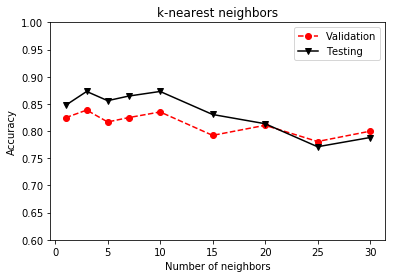

In [4]:
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
%matplotlib inline

numNeighbors = [1, 3, 5, 7, 10, 15, 20, 25, 30]
validationAcc = np.zeros(len(numNeighbors))
testAcc = np.zeros(len(numNeighbors))
index = 0
numFolds = 10

np.random.seed(1)
for nn in numNeighbors:
    clf = KNeighborsClassifier(n_neighbors=nn)
    scores = cross_val_score(clf, X_train, Y_train, cv=numFolds)
    validationAcc[index] = np.mean(scores)
    clf.fit(X_train, Y_train)
    Y_predTest = clf.predict(X_test)
    testAcc[index] = accuracy_score(Y_test, Y_predTest)
    index += 1
    
plt.plot(numNeighbors, validationAcc, 'ro--', numNeighbors, testAcc, 'kv-')
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.title('k-nearest neighbors')
plt.legend(['Validation','Testing'])
plt.ylim([0.6,1.0])

bestHyperparam = np.argmax(validationAcc)
print('Best hyperparameter, k =', numNeighbors[bestHyperparam])
print('Test Accuracy =', testAcc[bestHyperparam])

**6.** Repeat previous question using logistic regression with 'l1' penalty and 'liblinear' as its solver. Set the regularization parameter C to 0.1, 0.5, 1, 3, 5, 8, 10, 15, 20, and 30. Use 10-fold cross validation for hyperparameter tuning and store the validation set accuracy for each hyperparameter by averaging the accuracy over all 10 folds. Report also the test accuracy for each hyperparameter and draw a plot of test set accuracy and validation set accuracy against the regularization parameter C. Display the hyperparameter that gives the highest validation accuracy. Display the test accuracy for the chosen best hyperparameter.

**Solution:**

Best hyperparameter, C = 3
Test Accuracy = 1.0


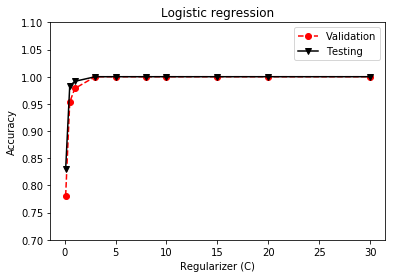

In [5]:
from sklearn import linear_model

regularizers = [0.1,0.5,1,3,5,8,10,15,20,30]
validationAcc = np.zeros(len(regularizers))
testAcc = np.zeros(len(regularizers))
index = 0

np.random.seed(1)
for C in regularizers:
    clf = linear_model.LogisticRegression(C=C, solver='liblinear', penalty='l1')
    scores = cross_val_score(clf, X_train, Y_train, cv=10)
    validationAcc[index] = np.mean(scores)
    clf.fit(X_train, Y_train)
    Y_predTest = clf.predict( X_test )
    testAcc[index] = accuracy_score(Y_test, Y_predTest)
    index += 1
    
plt.plot(regularizers, validationAcc, 'ro--', regularizers, testAcc, 'kv-')
plt.xlabel('Regularizer (C)')
plt.ylabel('Accuracy')
plt.title('Logistic regression')
plt.legend(['Validation','Testing'])
plt.ylim([0.7,1.1])

bestHyperparam = np.argmax(validationAcc)
print('Best hyperparameter, C =', regularizers[bestHyperparam])
print('Test Accuracy =', testAcc[bestHyperparam])

**7.** Repeat previous question using the random forest ensemble classifier. Set the number of estimators (trees) to 500. Since there are no hyperparameter to tune, you only need to fit the classifier to the entire training set and apply it to the test set. Calculate the test set accuracy and display it.

In [6]:
from sklearn import ensemble
from sklearn.tree import DecisionTreeClassifier

numEstimators = 500
np.random.seed(1)
clf = ensemble.RandomForestClassifier(n_estimators=numEstimators)
clf.fit(X_train, Y_train)
Y_pred = clf.predict(X_test)
print('Test Accuracy =', accuracy_score(Y_test, Y_pred))

Test Accuracy = 0.9661016949152542
